In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
data = pd.read_csv('mlb 1972-2021.csv')

# Dataset Sample

In [3]:
data.head()

,Tm,Year,#Bat,BatAge,G,PA,AB,R/G,H,2B,...,Fld%,Rtot,Rtot/yr,BPF,PPF,#a-tA-S,1Run,Under500,SOS,W-L%
0,Atlanta Braves,1972,36,27.2,155,38.316129,34.051613,4.05,8.793548,1.200000,...,0.974,-38,-4,109,109,13,0.536,0.458,0.1,0.455
1,Baltimore Orioles,1972,32,28.7,154,36.857143,32.649351,3.37,7.487013,1.253247,...,0.983,78,8,103,100,17,0.448,0.448,0.0,0.519
2,Boston Red Sox,1972,38,28.9,155,37.883871,33.600000,4.13,8.316129,1.477419,...,0.978,-43,-4,106,105,19,0.579,0.445,0.0,0.548
3,California Angels,1972,40,29.1,155,36.387097,33.322581,2.93,8.058065,1.103226,...,0.981,8,1,94,95,12,0.567,0.361,0.0,0.484
4,Chicago Cubs,1972,41,30.0,156,38.147436,33.634615,4.39,8.628205,1.320513,...,0.979,-25,-2,110,109,16,0.449,0.551,-0.1,0.548


# Null Values and Data Types

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 80 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tm        1396 non-null   object 
 1   Year      1396 non-null   int64  
 2   #Bat      1396 non-null   int64  
 3   BatAge    1396 non-null   float64
 4   G         1396 non-null   int64  
 5   PA        1396 non-null   float64
 6   AB        1396 non-null   float64
 7   R/G       1396 non-null   float64
 8   H         1396 non-null   float64
 9   2B        1396 non-null   float64
 10  3B        1396 non-null   float64
 11  HR        1396 non-null   float64
 12  RBI       1396 non-null   float64
 13  SB        1396 non-null   float64
 14  CS        1396 non-null   float64
 15  BB        1396 non-null   float64
 16  SO        1396 non-null   float64
 17  BA        1396 non-null   float64
 18  OBP       1396 non-null   float64
 19  SLG       1396 non-null   float64
 20  OPS       1396 non-null   floa

# Descriptive Statistics

In [5]:
data1 = data.iloc[:, :20]
data2 = data.iloc[:, 20:40]
data3 = data.iloc[:, 40:60]
data4 = data.iloc[:, 60:80]

In [6]:
data1.describe()

,Year,#Bat,BatAge,G,PA,AB,R/G,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,1997.544413,43.327364,28.509312,157.263610,38.291246,34.102335,4.485172,8.850655,1.650427,0.199784,0.958670,4.240319,0.644977,0.290750,3.277134,6.397728,0.259383,0.326920,0.403717
std,14.293048,6.358546,1.355916,17.641248,0.744852,0.558596,0.541904,0.543952,0.225686,0.063854,0.264990,0.535957,0.246696,0.109821,0.428688,1.277360,0.012627,0.014386,0.031635
min,1972.000000,29.000000,24.600000,58.000000,34.672414,30.206897,2.930000,6.500000,1.000000,0.030864,0.290909,2.709677,0.108974,0.050000,2.254658,3.613497,0.212000,0.283000,0.290000
25%,1985.000000,39.000000,27.600000,162.000000,37.803378,33.777778,4.117500,8.481481,1.487654,0.154321,0.770186,3.867612,0.460123,0.209877,2.969136,5.442901,0.251000,0.317000,0.382000
50%,1998.000000,43.000000,28.400000,162.000000,38.271605,34.105264,4.460000,8.845679,1.660494,0.196319,0.944444,4.225999,0.617284,0.277778,3.259259,6.293981,0.259000,0.326000,0.402000
75%,2010.000000,47.000000,29.400000,162.000000,38.759259,34.456790,4.830000,9.216049,1.808642,0.237265,1.135802,4.593513,0.796296,0.354037,3.567901,7.192901,0.268000,0.337000,0.426000
max,2021.000000,69.000000,33.500000,164.000000,40.805310,35.685185,6.230000,10.395062,2.320988,0.487654,1.966667,5.925926,2.118012,0.763975,4.783951,10.133333,0.294000,0.374000,0.495000


In [7]:
data2.describe()

,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,#P,PAge,RA/G,ERA,GF,CG,tSho,cSho,SV,IP,H_P
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,0.730625,96.890401,13.776660,0.762923,0.286324,0.339143,0.280600,0.271448,7.017325,21.138968,28.378725,4.485322,4.108159,0.906960,0.093032,9.374642,4.006447,0.239187,8.929883,8.850774
std,0.043014,8.435980,1.210340,0.103909,0.113447,0.146114,0.057008,0.103521,0.358768,5.615457,1.475117,0.568502,0.574795,0.094200,0.094193,4.161012,3.704008,0.053780,0.103205,0.587103
min,0.581000,73.000000,9.480519,0.462963,0.055556,0.000000,0.116667,0.016667,5.810345,11.000000,24.100000,2.790000,2.530000,0.419753,0.000000,0.000000,0.000000,0.067901,8.155172,6.482759
25%,0.702000,91.000000,12.962963,0.691358,0.197531,0.228395,0.240741,0.197531,6.771605,17.000000,27.400000,4.070000,3.700000,0.864198,0.024691,6.000000,1.000000,0.203704,8.875776,8.456790
50%,0.729000,97.000000,13.740741,0.759259,0.276074,0.343208,0.277778,0.263889,7.006173,21.000000,28.300000,4.430000,4.055000,0.944444,0.055556,9.000000,3.000000,0.240741,8.932099,8.845679
75%,0.760000,103.000000,14.570988,0.833333,0.358025,0.443924,0.315278,0.333333,7.252592,25.000000,29.200000,4.860000,4.500000,0.975309,0.135802,12.000000,6.000000,0.273292,8.994419,9.257002
max,0.851000,123.000000,17.481481,1.074074,0.866667,0.876543,0.475309,0.944444,8.197531,42.000000,34.200000,6.810000,6.380000,1.000000,0.580247,24.000000,21.000000,0.419753,9.228395,10.703704


In [8]:
data3.describe()

,R,ER,HR_P,BB_P,IBB_P,SO_P,HBP_P,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_P,#Fld
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,4.485255,4.073573,0.958731,3.277165,0.271441,6.397652,0.286322,0.046991,0.317668,38.291174,101.513610,4.115365,1.358277,8.919771,0.966905,3.303868,6.450287,1.986956,7.017307,42.882521
std,0.568498,0.548064,0.229625,0.409062,0.118538,1.288096,0.107514,0.038974,0.082908,0.775882,10.118536,0.481604,0.094217,0.613816,0.239071,0.422655,1.316036,0.501934,0.356525,6.441729
min,2.792208,2.506494,0.363636,2.148148,0.000000,3.549383,0.061728,0.000000,0.093168,34.293103,77.000000,2.840000,1.056000,6.900000,0.400000,2.100000,3.600000,1.030000,5.883333,29.000000
25%,4.074074,3.679012,0.788730,2.987654,0.185185,5.473765,0.197531,0.024691,0.259259,37.798814,95.000000,3.770000,1.292000,8.500000,0.800000,3.000000,5.500000,1.620000,6.790123,38.000000
50%,4.428571,4.024691,0.956790,3.252310,0.253086,6.271219,0.283642,0.037037,0.308642,38.277778,101.000000,4.090000,1.357000,8.900000,1.000000,3.300000,6.300000,1.900000,7.012346,42.000000
75%,4.864198,4.448707,1.117284,3.543210,0.345679,7.259259,0.364198,0.055556,0.370370,38.790123,108.000000,4.450000,1.420000,9.300000,1.100000,3.600000,7.300000,2.270000,7.235221,47.000000
max,6.808642,6.265432,1.882716,4.839506,0.716049,10.413580,0.666667,0.469136,0.604938,41.438272,146.000000,5.830000,1.733000,10.800000,1.900000,4.900000,11.000000,3.980000,8.302469,68.000000


In [9]:
data4.describe()

,RA/G_F,DefEff,GS,CG_F,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,BPF,PPF,#a-tA-S,1Run,Under500,SOS,W-L%
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,4.485279,0.694830,9.000004,6.836770,80.381781,37.892459,26.793747,10.384113,0.714599,0.919546,0.981194,0.101003,0.015759,100.025788,99.969914,12.381089,0.499519,0.484593,0.000788,0.499993
std,0.568490,0.013138,0.003454,0.370187,0.927523,1.125900,0.309413,0.885676,0.151192,0.118518,0.003676,38.110637,3.644769,4.764946,5.368616,3.552097,0.080305,0.100570,0.154245,0.071199
min,2.790000,0.642000,8.943750,5.582822,73.396552,33.016667,24.465517,7.366667,0.333333,0.550000,0.968000,-139.000000,-13.000000,86.000000,10.000000,4.000000,0.244000,0.160000,-0.500000,0.265000
25%,4.070000,0.686000,9.000000,6.607756,79.881988,37.209877,26.627329,9.848920,0.604938,0.839506,0.979000,-25.000000,-2.000000,97.000000,97.000000,10.000000,0.447000,0.425000,-0.100000,0.451000
50%,4.430000,0.695000,9.000000,6.864198,80.388889,37.941547,26.796296,10.415379,0.703704,0.919698,0.981000,1.000000,0.000000,100.000000,100.000000,12.000000,0.500000,0.481000,0.000000,0.500000
75%,4.860000,0.703000,9.000000,7.092593,80.961462,38.636790,26.987597,10.981763,0.814815,1.000000,0.984000,26.000000,2.250000,103.000000,103.000000,15.000000,0.553000,0.549000,0.100000,0.555250
max,6.810000,0.740000,9.093168,7.955975,83.055556,41.339806,27.685185,13.077670,1.238095,1.300000,0.991000,119.000000,11.000000,128.000000,128.000000,24.000000,0.766000,0.900000,0.600000,0.717000


# Histograms

Target Variable

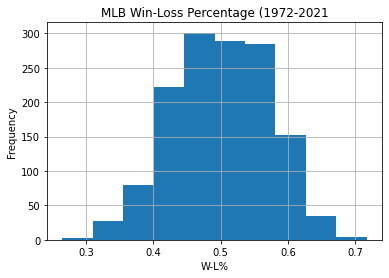

In [10]:
data['W-L%'].hist()
plt.xlabel('W-L%')
plt.ylabel('Frequency')
plt.title('MLB Win-Loss Percentage (1972-2021')
plt.show()

In [11]:
# Shapiro-Wilk test and skewness results indicate a normally distributed target variable (W-L%)
W, p = stats.shapiro(data['W-L%'])
skew = stats.skew(data['W-L%'])
print("Shapiro-Wilk\nW: {0} \np = {1}".format(W, p))
print()
print("Skew:",skew)

Shapiro-Wilk
W: 0.9956100583076477 
p = 0.0004522369708865881

Skew: -0.09277966616288065


All Features

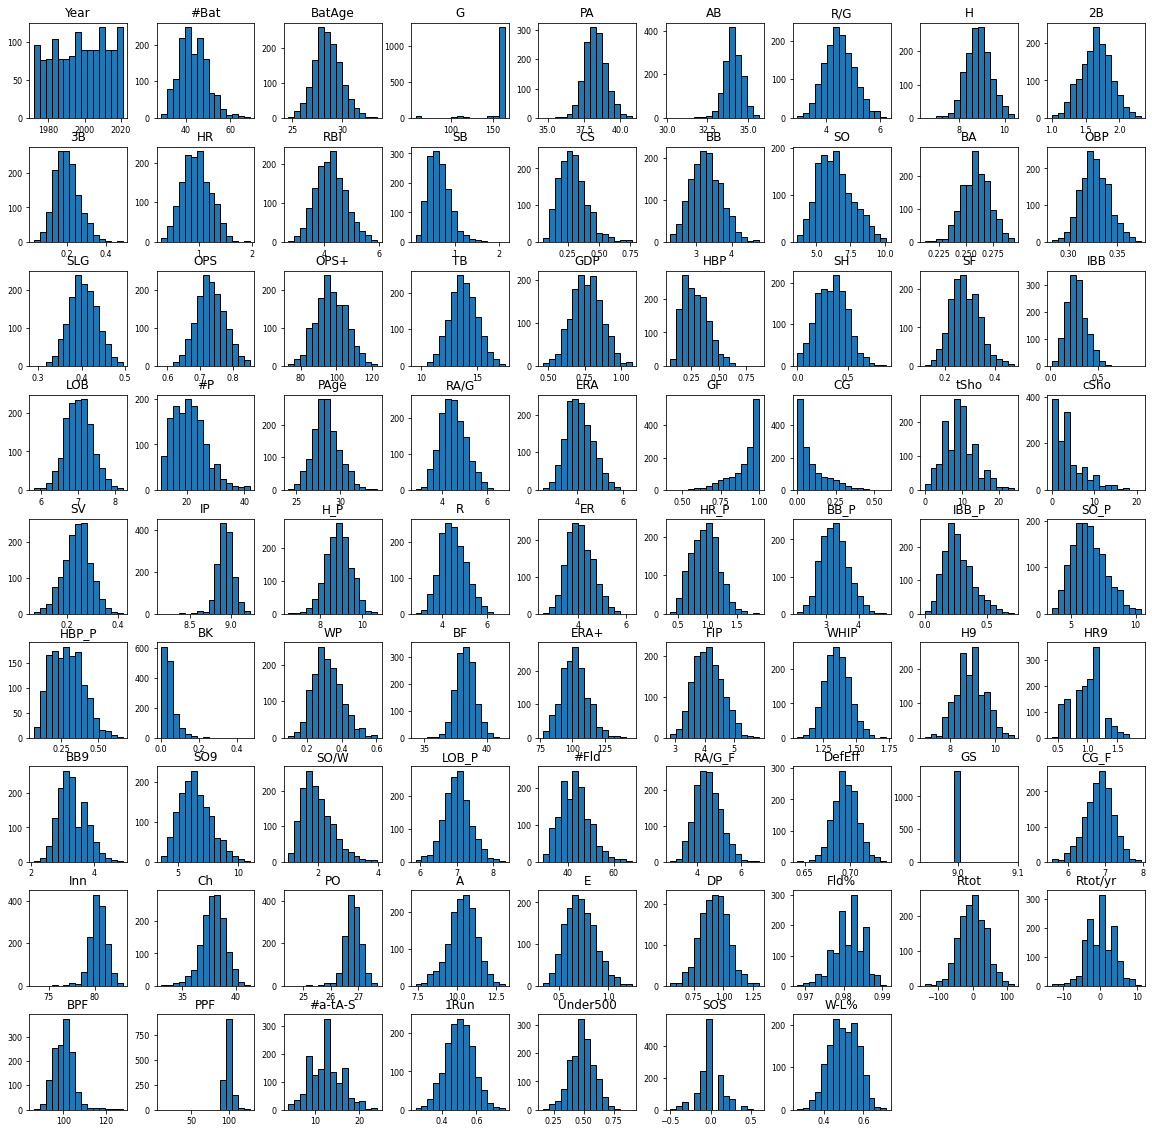

In [12]:
data.iloc[:, :80].hist(bins=15, linewidth=1.0, edgecolor='black',
          xlabelsize=8, ylabelsize=8, figsize=(20,20), grid=False)
plt.show()

# Density Plots

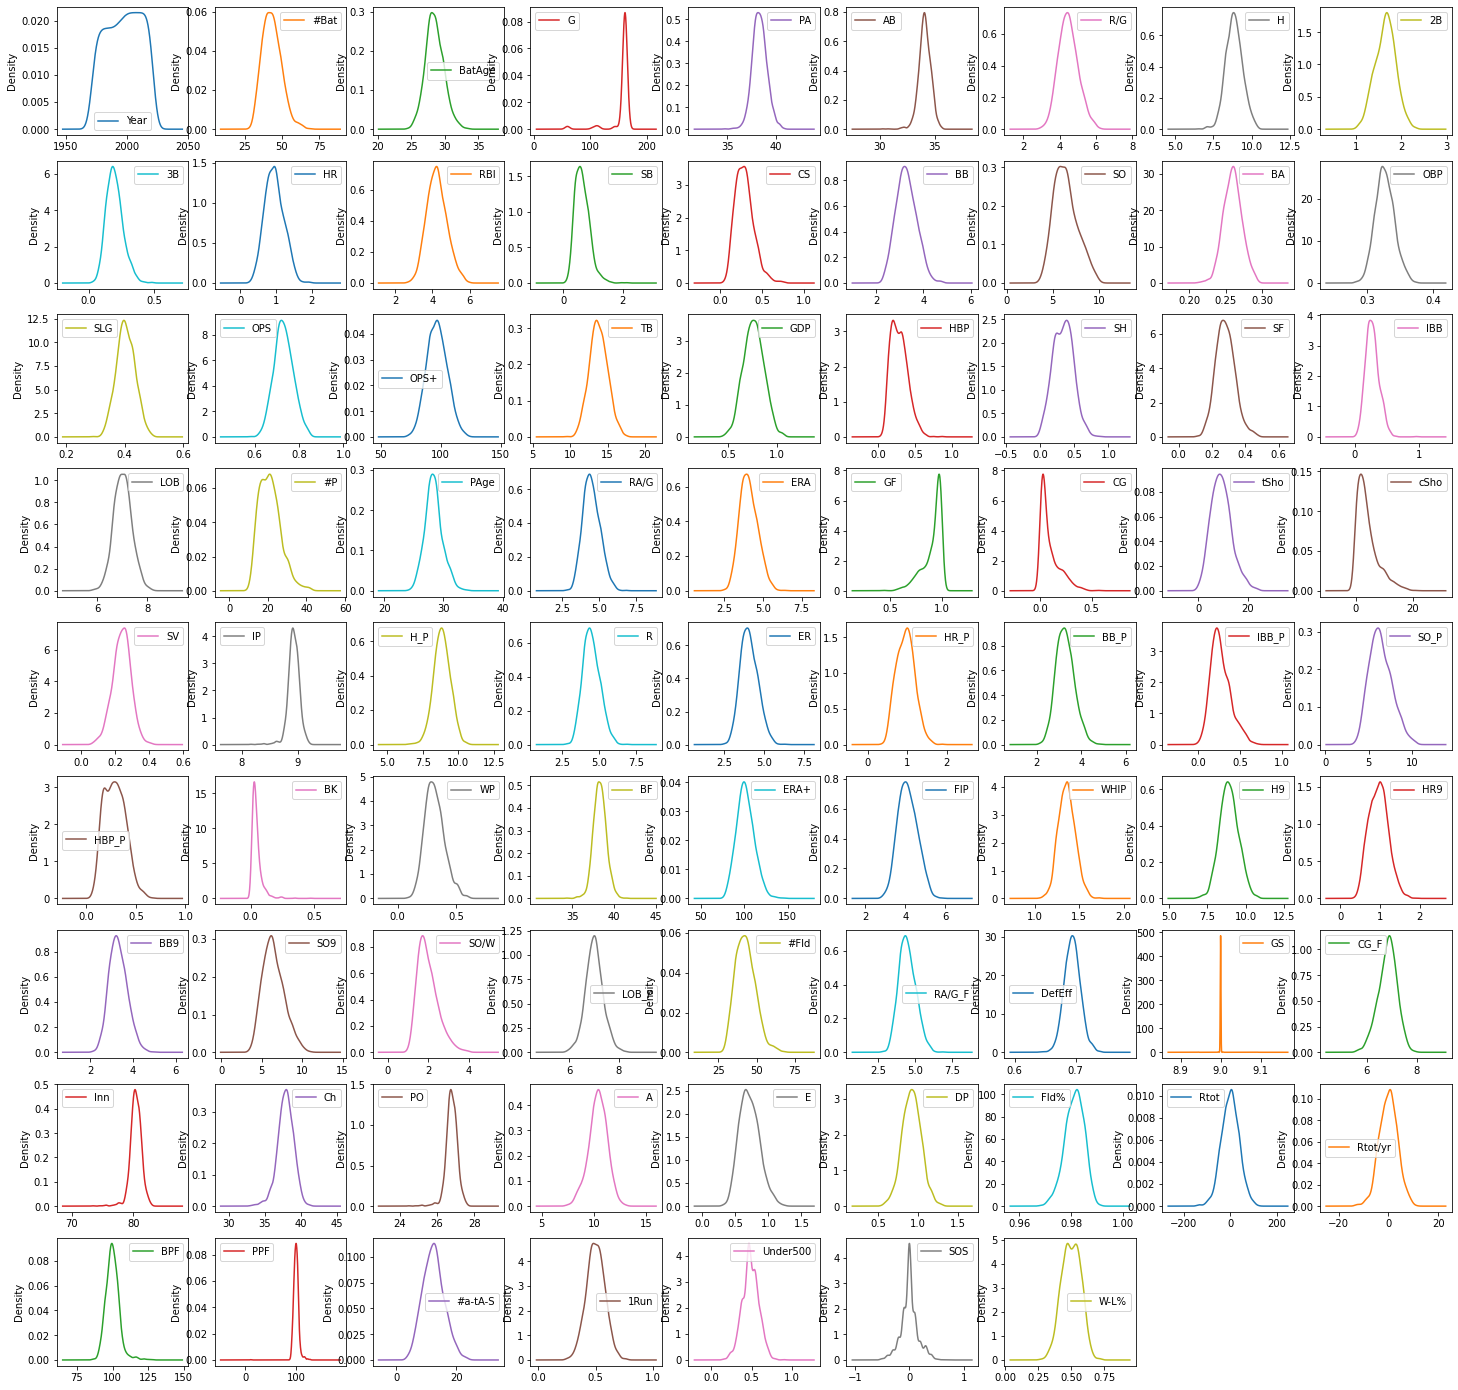

In [13]:
data.iloc[:, :80].plot(kind='density', subplots=True, layout=(9,9), figsize=(25,25), sharex=False)
plt.show()

# Box and Whisker Plots (Features 2-39)

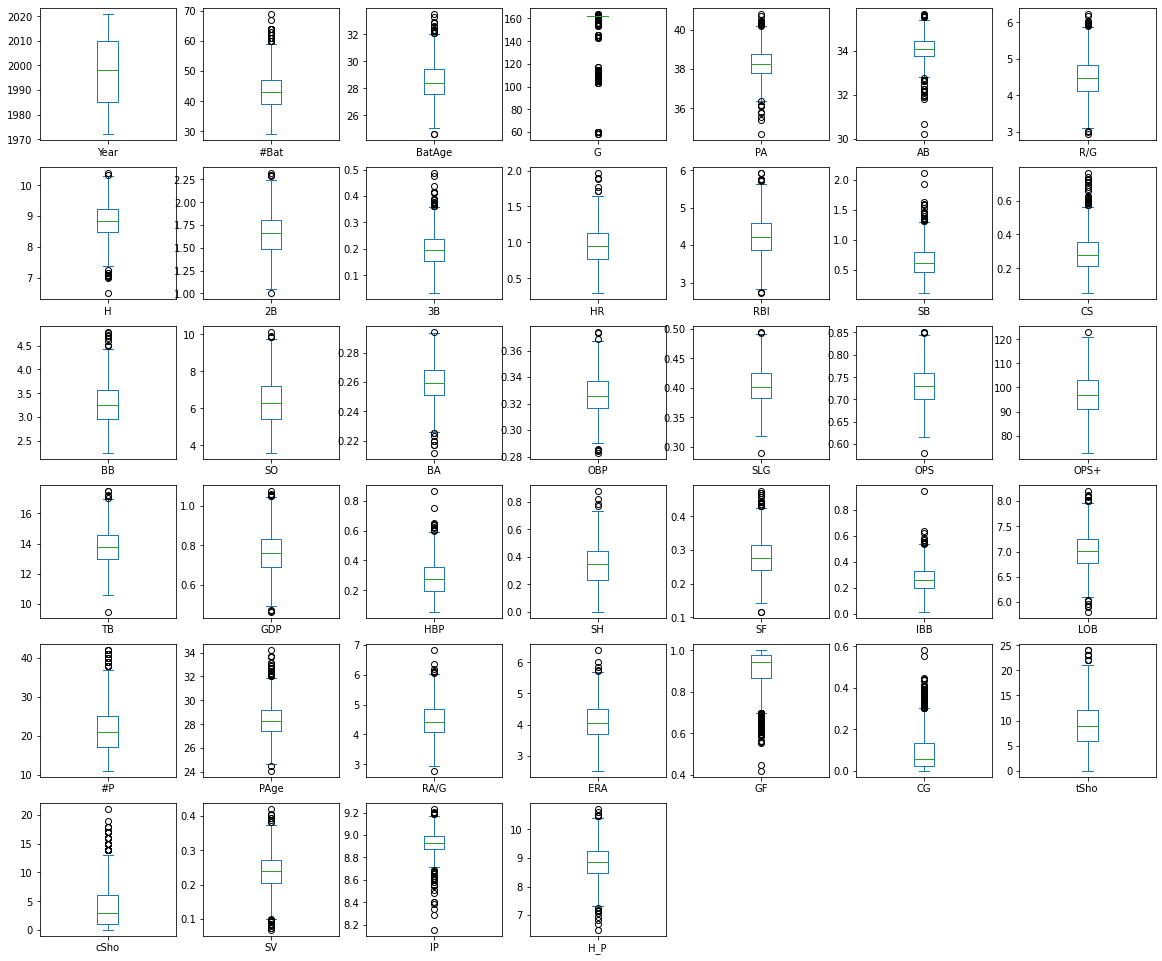

In [14]:
data.iloc[:, :40].plot(kind='box', subplots=True, layout=(7,7), figsize=(20,20), sharex=False, sharey=False)
plt.show()

# Box and Whisker Plots (Features 40-80)

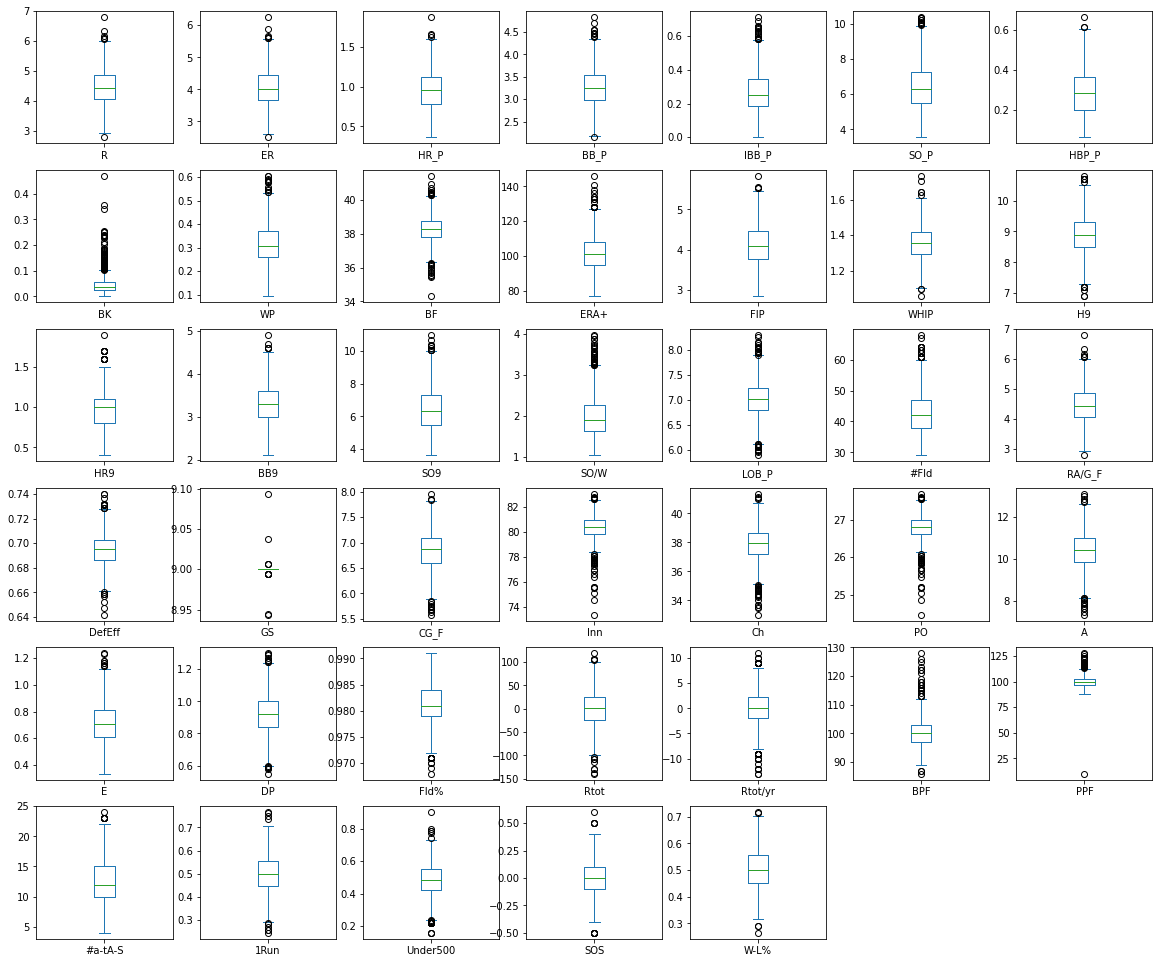

In [15]:
data.iloc[:, 40:80].plot(kind='box', subplots=True, layout=(7,7), figsize=(20,20), sharex=False, sharey=False)
plt.show()

# Correlation Plot


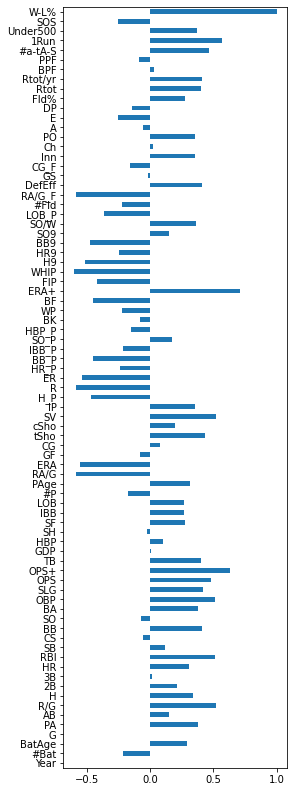

In [16]:
# Correlation coefficient between each independent variable and target variable (W-L%)
(data.corr().loc['W-L%'].plot(kind='barh', figsize=(4,14)))

# Correlation Matrix

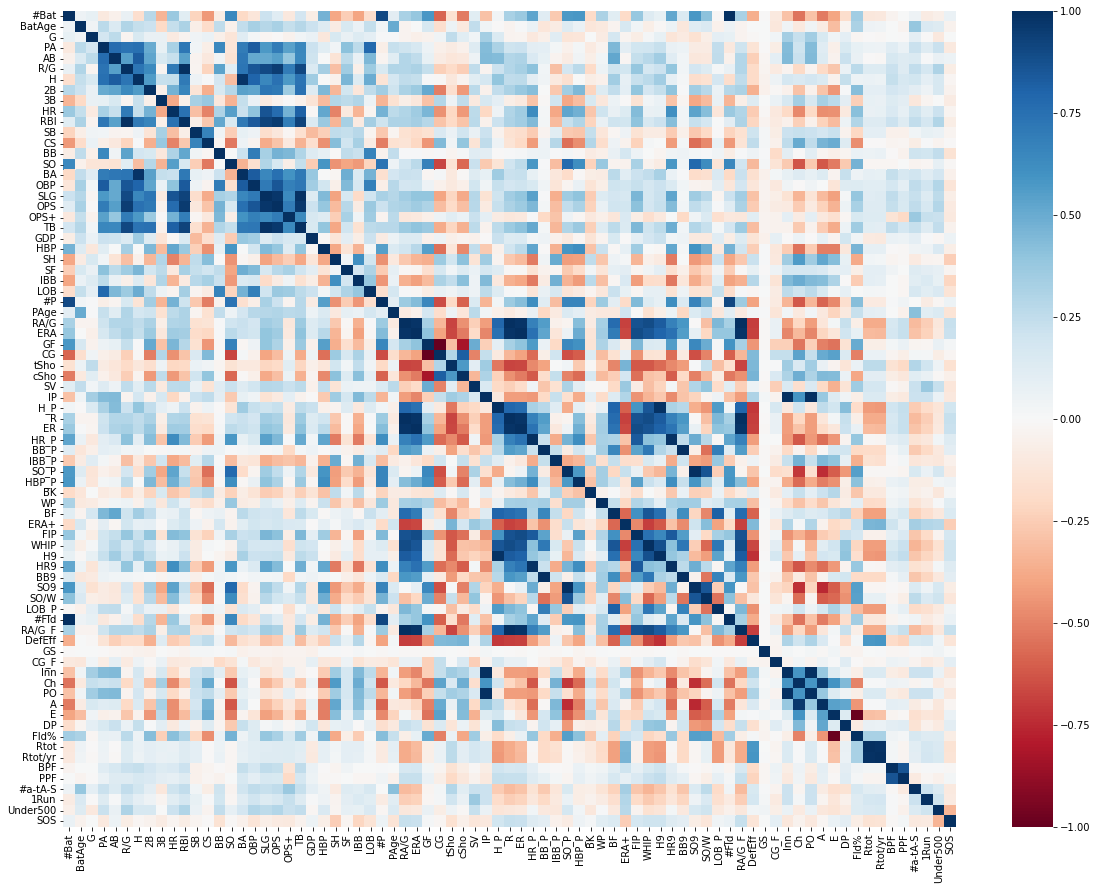

In [19]:
corr = data.iloc[:, 2:79].corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1)